## load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv("Microsoft_Stock.csv", parse_dates = ["Date"], index_col = "Date")

In [4]:
df.head()
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455
2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012
2021-03-31 16:00:00,232.91,239.10,232.39,235.77,43623471


## data wrangling

In [5]:
#set time series index
df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [6]:
df.shape

(1511, 5)

In [7]:
#Check missing values
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

What is the trend of stock price?

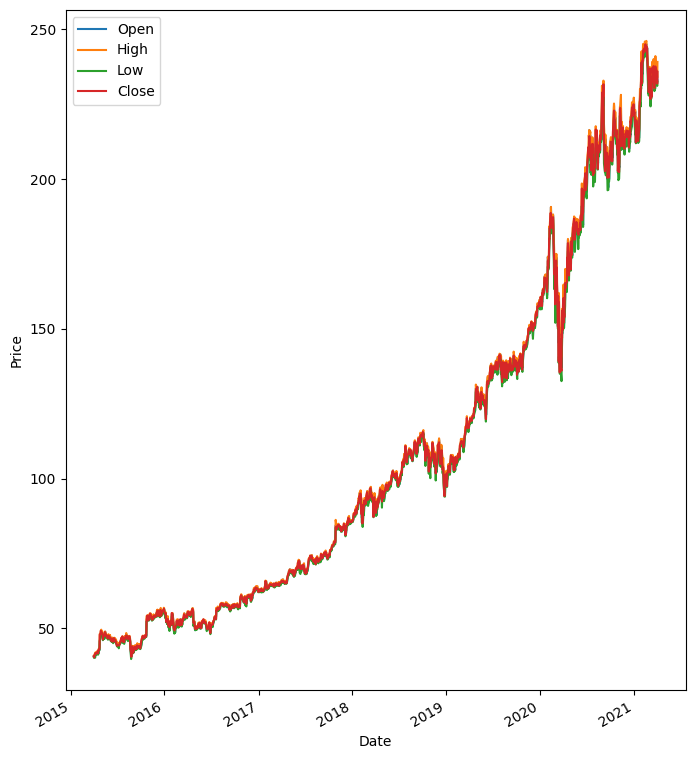

In [8]:
df[["Open","High","Low","Close"]].plot(figsize=(8,10),sharex = True, xlabel="Date", ylabel = "Price")
plt.show()

the four diffent type of prices has the same trend: over time, it increase from 50 in 2015 to near 150 in 2021. from now on, only need to select one price "Close" to further explore the data.

What's the daily, monthly and annual return?

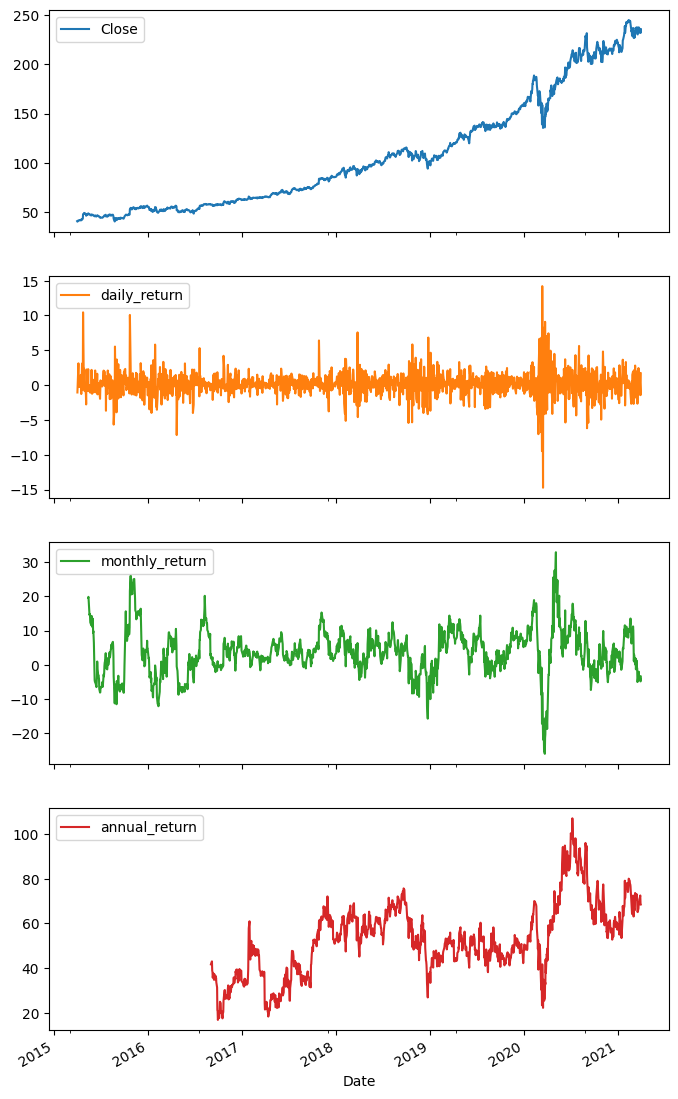

In [9]:
# Create daily_return,montly_return and annual_return
df['daily_return']= df.Close.pct_change(periods =1).mul(100)
df['monthly_return'] = df.Close.pct_change(periods = 30).mul(100)
df['annual_return'] = df.Close.pct_change(periods = 360).mul(100)
# Plot the result
df[["Close","daily_return","monthly_return","annual_return"]].plot(subplots=True,figsize = (8,15),sharex = True)
plt.show()

How about the stock move trend over monthly and annual?

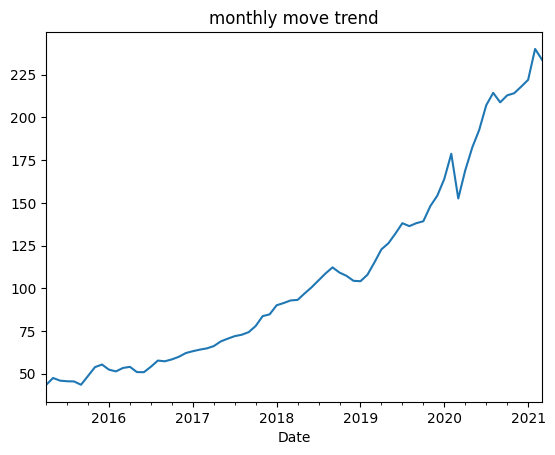

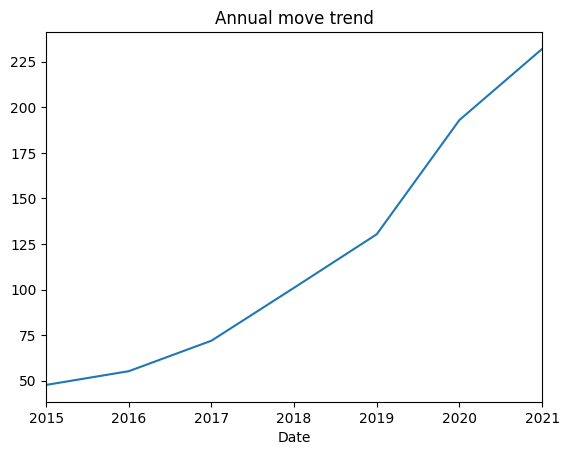

In [10]:
df["Close"].resample('M').mean().plot(title = "monthly move trend");
plt.show();
df["Close"].resample('A').mean().plot(title ="Annual move trend");
plt.show();

how about the volume distribution?

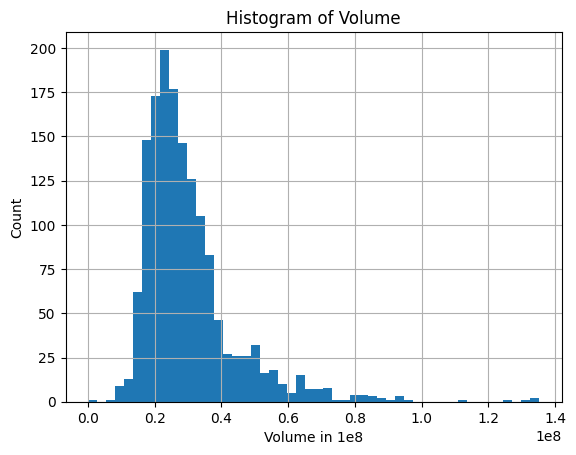

In [11]:
df["Volume"].hist(bins = 50)
plt.xlabel("Volume in 1e8")
plt.ylabel("Count")
plt.title("Histogram of Volume")
plt.show()

In [12]:
How about the statistic of the data?

Object `data` not found.


In [13]:
df.describe()

,Open,High,Low,Close,Volume,daily_return,monthly_return,annual_return
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,1510.000000,1481.000000,1151.000000
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07,0.131552,3.627613,53.041658
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07,1.744916,6.588028,16.143561
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05,-14.739029,-26.053619,16.761595
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07,-0.606950,0.017232,42.985812
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07,0.103206,3.487162,52.449541
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07,0.909569,7.409591,62.941176
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08,14.216885,32.931313,107.073361


what is the correlation among features?

<Axes: >

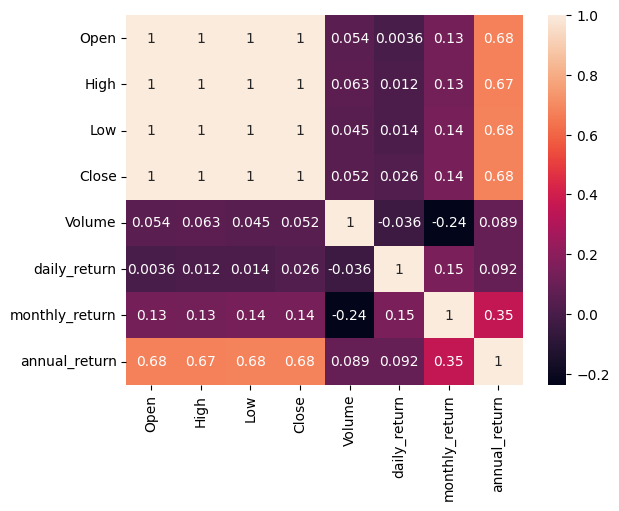

In [14]:
sns.heatmap(df.corr(),annot= True)

Since the four prices have high correlation, only choose one price for further analysis, choose "Close".

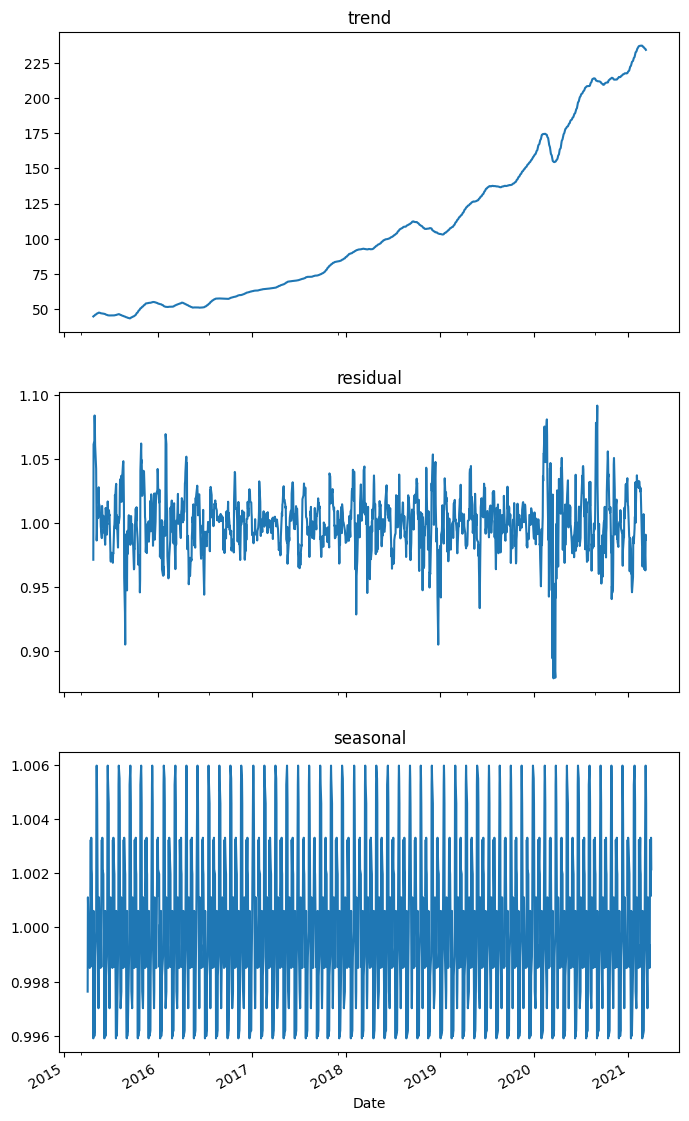

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,15),sharex=True)
trend.plot(title ="trend",ax=ax1)
residual.plot(title="residual",ax=ax2)
seasonal.plot(title="seasonal",ax=ax3)

plt.show()


it shows the stock has uptrend, and seasonal with every 12 month.

check wheather the data is stationary

In [16]:
# the null hypothesis of ADF is data is not-stationary

results= adfuller(df["Close"])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(1.7371362899270923, 0.9982158366942122, 24, 1486, {'1%': -3.4347582315402434, '5%': -2.863486949792871, '10%': -2.567806534528638}, 6604.225695235948)
The p-value of the test on prices is: 0.9982158366942122


the data is not stationary. so before modeling, need transform the data to stationary.

In [17]:
#record the firt original value for later use
start_val = df["Close"][0]
print(start_val)

40.72


C:\Users\Yan Zhang\AppData\Local\Temp\ipykernel_3372\3259805632.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_val = df["Close"][0]


(-10.038331065146433, 1.5195939917528986e-17, 24, 1485, {'1%': -3.43476120520139, '5%': -2.863488262178673, '10%': -2.567807233388883}, 6597.0173474503645)


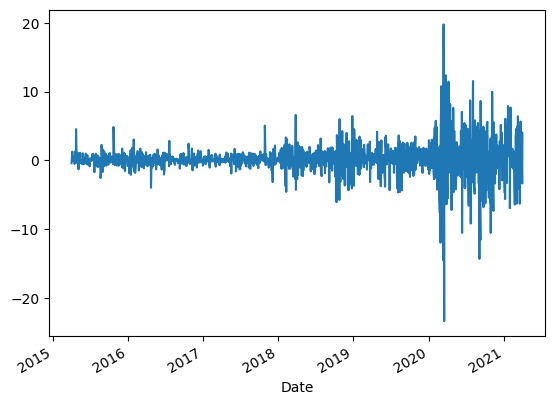

In [18]:
df_stationary = df["Close"].diff().dropna()
results_2 = adfuller(df_stationary)
print (results_2)

df_stationary.plot()
plt.show()

In [19]:
def find_outliers(df):
   mean_val=df.mean()
   std_val=df.std()
   outliers = df[((df<(mean_val-3*std_val)) | (df>(mean_val+3*std_val)))]
   return outliers

In [20]:
outliers = find_outliers(df_stationary)
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 31
max outlier value: 19.77000000000001
min outlier value: -23.410000000000025


In [21]:
upper_limit = df_stationary.mean()+3*df_stationary.std()
print(upper_limit)
lower_limit = df_stationary.mean()-3*df_stationary.std()
print(lower_limit)

7.198475467791654
-6.940131096930727


In [22]:
# df_stationary = np.where(
#     df_stationary > upper_limit, upper_limit,
#     np.where(df_stationary < lower_limit, lower_limit, df_stationary))
df_stationary = df_stationary.clip(upper_limit,lower_limit)


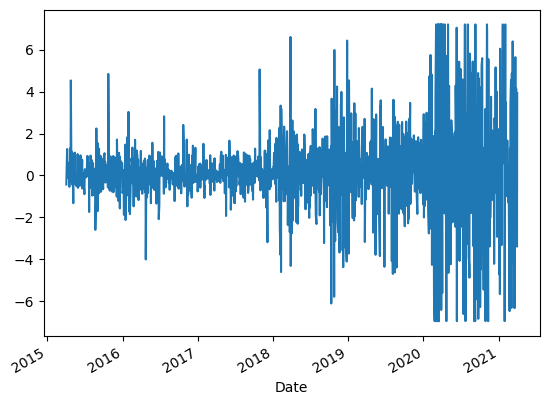

In [23]:
df_stationary.plot()
plt.show()

What is the acf and pacf looks like after data is stationary?

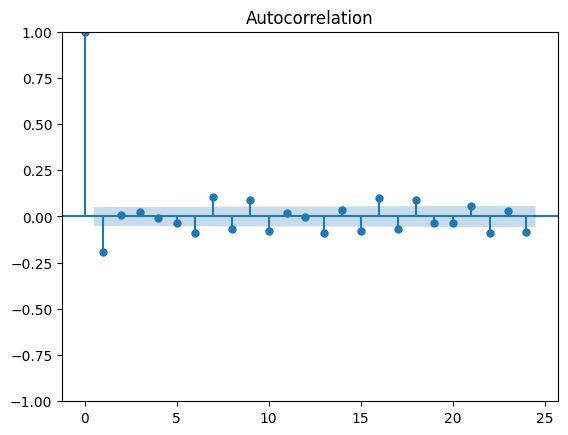

In [24]:
fig = tsaplots.plot_acf(df_stationary, lags=24)

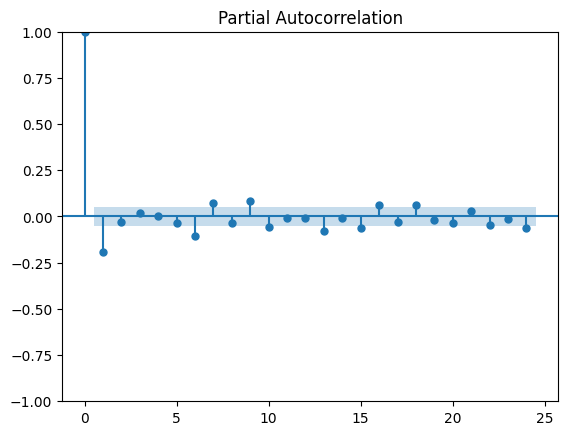

In [25]:
fig = tsaplots.plot_pacf(df_stationary, lags=24)

## ARIMA model

In [26]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [27]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
def arima_mse(data, arima_order):
    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    history = [x for x in train]
    pred = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        pred.append(yhat)
        history.append(test[i])
    mse = mean_squared_error(test, pred)
    return mse
    

In [28]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.

def different_arima_mse(data, p_values, d_values, q_values):
    best_score, best_order = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order =(p,d,q)
                try:
                    mse = arima_mse(data, order)
                    if mse < best_score:
                        best_score, best_order = mse,order
                    print('ARIMA%s MSE=%.15f' % (order,mse))
                except Exception as error:
                    print(error)
    return print('Best ARIMA%s MSE=%.15f' % (best_order, best_score))

In [29]:
# Now, we choose a couple of values to try for each parameter.
p_values= [x for x in range(0, 6)]
d_values = [1]
q_values = [x for x in range(0, 3)]

In [30]:
import warnings
warnings.filterwarnings('ignore')
different_arima_mse (df_stationary, p_values,d_values,q_values)

ARIMA(0, 1, 0) MSE=34.258645640568098
ARIMA(0, 1, 1) MSE=14.000994018442018
ARIMA(0, 1, 2) MSE=13.402240268571227
ARIMA(1, 1, 0) MSE=21.571794252905111
ARIMA(1, 1, 1) MSE=13.395974217287270
ARIMA(1, 1, 2) MSE=13.930783202670540
ARIMA(2, 1, 0) MSE=18.460278460425851
ARIMA(2, 1, 1) MSE=13.528703086595842
ARIMA(2, 1, 2) MSE=13.496909675605172
ARIMA(3, 1, 0) MSE=17.060244238808576
ARIMA(3, 1, 1) MSE=13.593504334915041
ARIMA(3, 1, 2) MSE=13.565894297588065
ARIMA(4, 1, 0) MSE=16.517538400136967
ARIMA(4, 1, 1) MSE=13.678633096207523
ARIMA(4, 1, 2) MSE=13.619003007065436
ARIMA(5, 1, 0) MSE=16.645972920371516
ARIMA(5, 1, 1) MSE=13.771582538227436
ARIMA(5, 1, 2) MSE=13.659530807504987
Best ARIMA(1, 1, 1) MSE=13.395974217287270


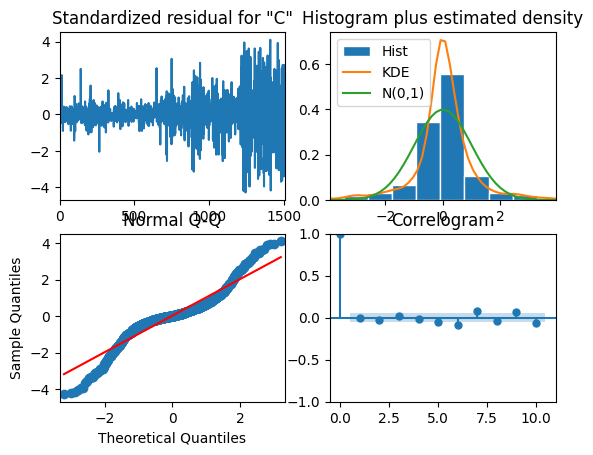

In [35]:
from statsmodels.tsa.arima.model import ARIMA

p,d,q = (1,1,1)
model = ARIMA(df_stationary, order=(p,d,q))
model_fit = model.fit()
#check the model fits
model_fit.plot_diagnostics(); #;to suppress the duplicate of pictures.

In [ ]:
It suggests the residual of the model is normal distribute.

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3166.500
Date:                Tue, 19 Dec 2023   AIC                           6339.001
Time:                        05:02:46   BIC                           6354.958
Sample:                             0   HQIC                          6344.944
                               - 1510                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1945      0.014    -13.459      0.000      -0.223      -0.166
ma.L1         -0.9980      0.002   -628.377      0.000      -1.001      -0.995
sigma2         3.8768      0.084     46.039      0.000       3.712       4.042
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               924.80
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):              15.16   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict the latest 30 days stock price change

In [47]:
forecast_period = 30
last_date = df["Close"].index[-1]
# Create a range of future dates for the forecast period
future_dates = pd.date_range(start=last_date, periods=forecast_period + 1, freq="D")[1:]
# Get predictions for the future period
forecast_results = model_fit.get_prediction(start=forecast_period * -1)
forecast_values = forecast_results.predicted_mean
forecast_conf_int = forecast_results.conf_int()

# Reverse the differencing for the predictions and confidence intervals
forecast_original = df['Close'].iloc[-1] + forecast_values.cumsum()
lower_limits = df['Close'].iloc[-1] + forecast_conf_int.iloc[:, 0].cumsum()
upper_limits = df['Close'].iloc[-1] + forecast_conf_int.iloc[:, 1].cumsum()

# Create a DataFrame to store the results
future_price = pd.DataFrame(index=future_dates)
future_price["Prediction"] = forecast_original.values
future_price["Lower_Limits"] = lower_limits.values
future_price["Upper_Limits"] = upper_limits.values

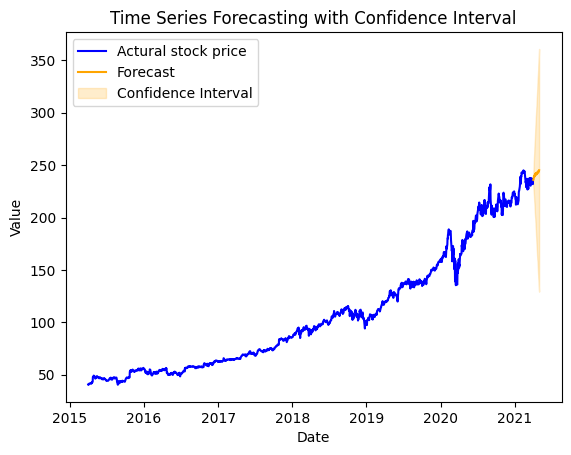

In [55]:
plt.plot(df.index, df['Close'], label='Actural stock price', color='blue')
plt.plot(future_price.index, future_price["Prediction"], label='Forecast', color='orange')

# Shade the confidence interval
plt.fill_between(future_price.index, future_price["Lower_Limits"], future_price["Upper_Limits"], color='orange', alpha=0.2, label='Confidence Interval')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasting with Confidence Interval')

# Display legend
plt.legend(loc="upper left")

# Show the plot
plt.show()


As it shows the forecast of future 30 days stock price, the variance is very large, from 130 to 350. In future, can apply different models. 